# CodSoft Internship Task - Titanic Survival Prediction

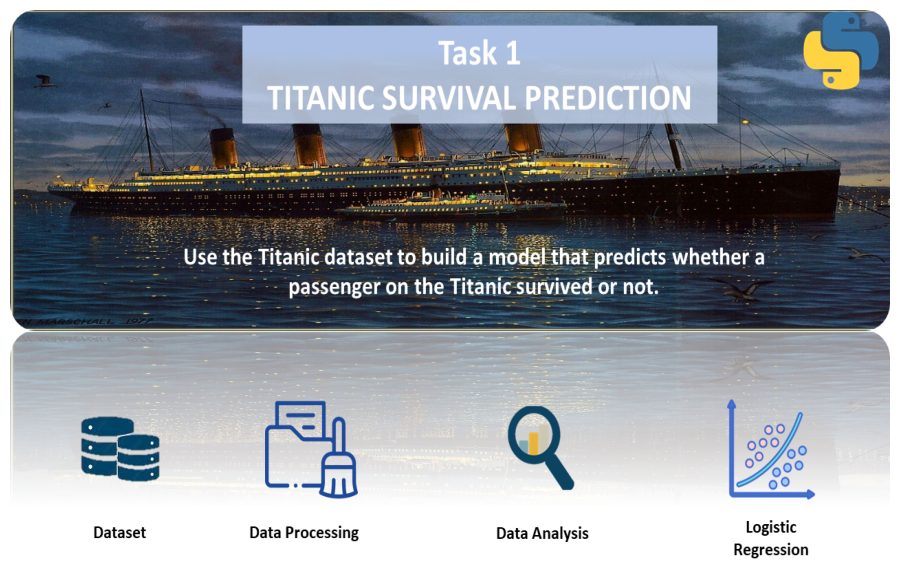

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your image
image_path = r'C:\Users\Asad Ali\Desktop\Courses\Internship\CodSoft\Task 1 - Titanic Survival\Slide1.png'

# Load the image
img = mpimg.imread(image_path)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(11, 7))

# Display the image in the center
ax.imshow(img, aspect='auto')  # Set aspect to 'auto' to maintain the image's aspect ratio

# Turn off axis labels and ticks
ax.axis('off')

# Center the image within the figure
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

## Importing Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Importing Dataset

In [47]:
# create a pandas DataFrame to read csv
df = pd.read_csv(r"C:\Users\Asad Ali\Desktop\Courses\Internship\CodSoft\Task 1 - Titanic Survival\titanic.csv")
# show first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Understanding DataFrame

In [48]:
# check the records and attributes of the DataFrame (rows and columns)
df.shape

(418, 12)

In [49]:
# display basic statistics of the DataFrame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
# check if there are any null values in the DataFrame
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
# check datatypes of all the columns in the DataFrame
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Preprocessing & EDA

In [52]:
# take mean of Age column and fill the value for all the missing values in that column
df['Age'] = df['Age'].fillna(df['Age'].mean())
# similarly take mean of fare column and fill the missing values
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [53]:
df['Fare']
df['Age'] 

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [54]:
# display all the unique values in the column Embarked
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


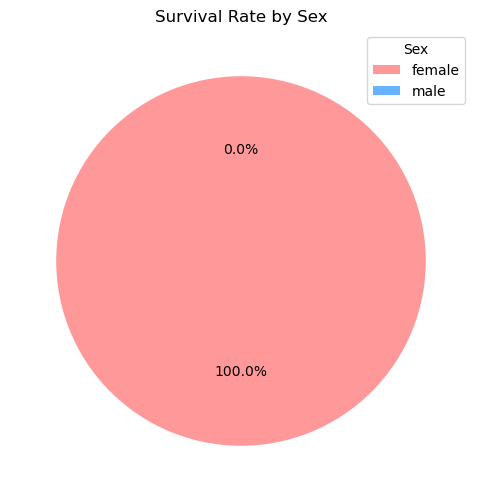

In [55]:
# Calculate survival rates for each sex
survival_rates = df.groupby('Sex')['Survived'].mean()

# Define custom colors for pie chart
colors = ['#ff9999', '#66b3ff']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_rates, labels=None, autopct='%1.1f%%', startangle=90, colors= colors)
plt.title('Survival Rate by Sex')

# Create a legend
plt.legend(survival_rates.index, title='Sex', loc='upper right', bbox_to_anchor=(1, 1))

# Display the chart
plt.show()

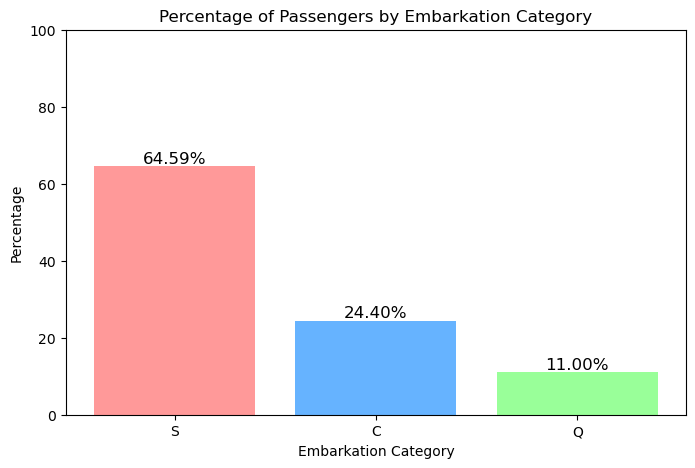

In [56]:
# Calculate the percentage of passengers for each embarkation category
embarked_percentage = df['Embarked'].value_counts(normalize=True) * 100

# Create a bar chart for embarked percentage
plt.figure(figsize=(8, 5))
bars = plt.bar(embarked_percentage.index, embarked_percentage.values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel('Embarkation Category')
plt.ylabel('Percentage')
plt.title('Percentage of Passengers by Embarkation Category')
plt.ylim(0, 100)
plt.bar_label(bars, labels=[f'{percentage:.2f}%' for percentage in embarked_percentage], fontsize=12)

# Display the chart
plt.show()

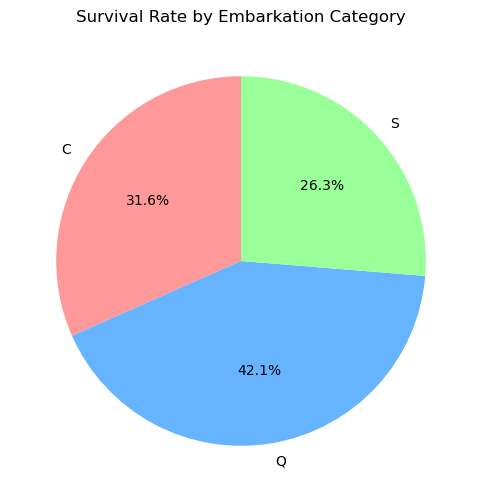

In [57]:
# Calculate survival rates for each embarkation category
survival_rates = df.groupby('Embarked')['Survived'].mean()

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a pie chart for survival rate
plt.figure(figsize=(6, 6))
plt.pie(survival_rates, labels=survival_rates.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Rate by Embarkation Category')

# Display the chart
plt.show()

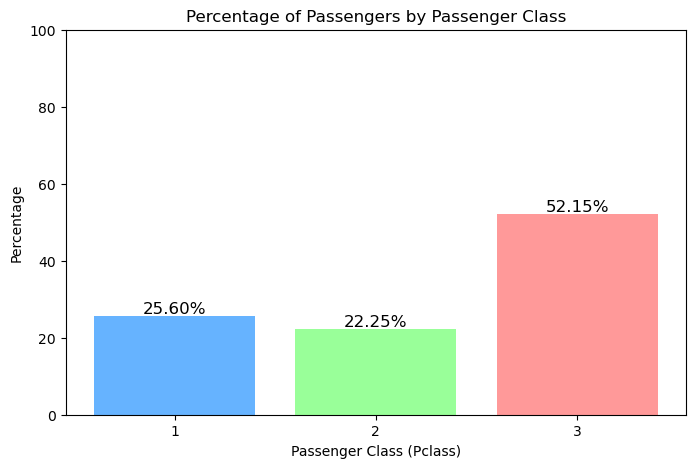

In [58]:
# Calculate the percentage of passengers for each passenger class
pclass_percentage = df['Pclass'].value_counts(normalize=True) * 100

# Create a bar chart for Pclass percentage
plt.figure(figsize=(8, 5))
bars = plt.bar(pclass_percentage.index, pclass_percentage.values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Percentage')
plt.title('Percentage of Passengers by Passenger Class')
plt.xticks(pclass_percentage.index)
plt.ylim(0, 100)

plt.bar_label(bars, labels=[f'{percentage:.2f}%' for percentage in pclass_percentage], fontsize=12)
# Display the chart
plt.show()

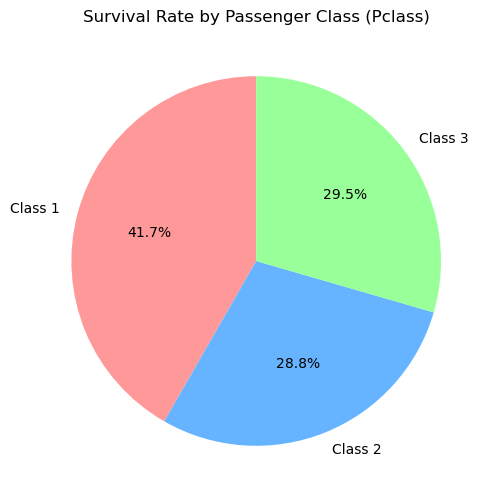

In [59]:
# Calculate survival rates for each passenger class
survival_rates = df.groupby('Pclass')['Survived'].mean()

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a pie chart for survival rate by Pclass
plt.figure(figsize=(6, 6))
plt.pie(survival_rates, labels=survival_rates.index.map({1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Rate by Passenger Class (Pclass)')

# Display the chart
plt.show()


In [60]:
# map values from Embarked and Sex columns to integer values and change the datatype
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [1]:
# change the datatypes of columns Age and Fare from float to integer
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

NameError: name 'df' is not defined

In [62]:
# check the datatypes of all the columns once again to see the changes
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int32
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked        int32
dtype: object

In [63]:
# create a copy of df DataFrame without columns PassengerId, Name, Cabin, and Ticket
df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)
# show first 5 records of the DataFrame
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


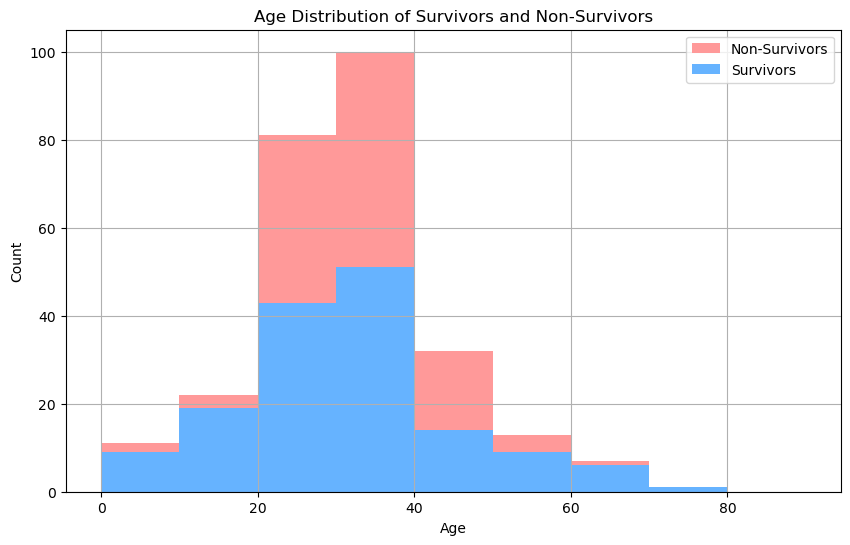

In [65]:
# Filter data for survivors and non-survivors
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

# Create bins with a difference of 10
bins = range(0, 91, 10)  # Bins from 0 to 90 with a step of 10

# Create a histogram for the age distribution of survivors
plt.figure(figsize=(10, 6))
plt.hist(non_survivors['Age'].dropna(), bins=bins, color='#ff9999', label='Non-Survivors')
plt.hist(survivors['Age'].dropna(), bins=bins, color='#66b3ff', label='Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.grid(True)

# Display the histogram
plt.show()

## Splitting the data

In [67]:
train = df.drop(['Survived'], axis=1)
test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 1)

In [68]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 92.86%


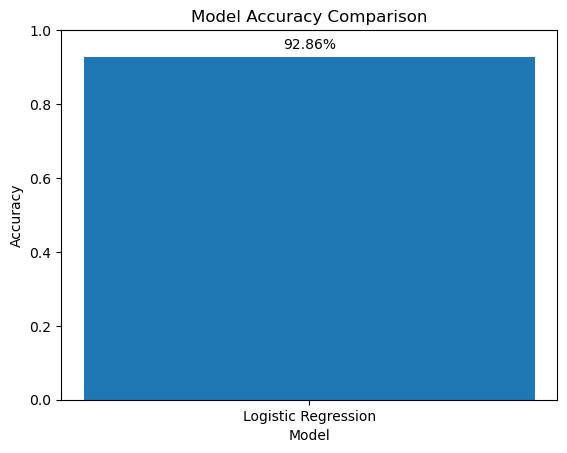

In [85]:
LRAcc = 0.9286 

# Create a bar graph
plt.bar(['Logistic Regression'], [LRAcc])
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage

# Add labels
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the accuracy as text on top of the bar
plt.text('Logistic Regression', LRAcc + 0.02, f'{LRAcc*100:.2f}%', ha='center')

# Show the graph
plt.show()